# A Deep Learning Example in Tensorflow 2.0

### Imports required, with the addition of TensorFlow

In [41]:
import tensorflow as tf
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

### Creating the dataset
This dataset is created articically using the numpy.random.uniform function. This creates a unifromly distributed sample from (low, high, size)

In [47]:
## Defining the number of observations to create
observations = 1000

## Creating a list of inputs ranging from -10 to 10. The number of inputs generated
## is equal to the observations and the tensor created is of shape (observations, 1)
inputs_xs = np.random.uniform(-10,10,(observations, 1)) 
inputs_zs = np.random.uniform(-10,10,(observations, 1)) 
bias = np.random.uniform(-.1,.1, (observations, 1))
print("Shape of inputs_xs: {}\nShape of inputs_zs: {} \nShape of bias: {}".format(inputs_xs.shape, inputs_zs.shape, bias.shape))

## The function defined below is used to generate the outputs. We are trying to predict
## the coeffecients 2, 3, and 5. The bias is added to slightly offset the results
func = 2*inputs_xs - 3*inputs_zs + 5 + bias
print("Shape of func: {}".format(func.shape))

Shape of inputs_xs: (1000, 1)
Shape of inputs_zs: (1000, 1) 
Shape of bias: (1000, 1)
Shape of func: (1000, 1)


### Combining the two inputs into one column table
The two input variables (xs,zs) are combined together into one table using the np.column_stack((t1,t2)) function.
Numpy uses the .npz file format. We are going to save the generated data into this file format and read it in later.

In [48]:
## Combining the two inputs into one numpy array with 2 columns
## Shape of the tensor is (1000, 2)
combined_inputs = np.column_stack((inputs_xs, inputs_zs))
print("Shape of combined inputs: {}".format(combined_inputs.shape))

## Saving to the .npz file format
## Note the syntax is label=array so the label (inputs, targets) are lables needed 
## to fetch that information.
np.savez('TF_intro.npz', inputs = combined_inputs, targets = func)

Shape of combined inputs: (1000, 2)


### Loading up the npz file and creating the NN

In [81]:
## Loading up the npz file that holds our training data
training_data = np.load('TF_intro.npz')
training_data['inputs'].shape
training_data['targets'].shape

(1000, 1)

In [84]:
## Defining the number of inputs and outputs. The inputs are the number of variables
## going into the prediction and the outputs are the number of variables predicted
## In this examples case xs and zs are inputs, 2, and output is pred or 1
input_size = 2
output_size = 1

## Creating the basic model using tensorflow. Sequential takes in parameters for different layers to add to your model
model = tf.keras.Sequential()

## The Dense function takes the inputs provided to the model and calculates the dot product of the inputs
## and weights and adds the bias
## output = np.dot(inputs, weights) + bias
model.add(tf.keras.layers.Dense(output_size, kernel_initializer=tf.random_uniform_initializer(-.1,.1),\
    bias_initializer=tf.random_uniform_initializer(-.1,.1)))

## This is step 3 of the ML phase where we are choosing the optimizing function, or loss function, in this 
## case we are using L2_norm or mean_squared_error as the loss
## The optimizer, gradient descent, is the optimization function

custom_opti = tf.keras.optimizers.SGD(learning_rate=0.02) ## This is useful for predefining the learning rate
model.compile(optimizer=custom_opti, loss='mse')
model.fit(training_data['inputs'], training_data['targets'], epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 963us/step - loss: 20.7246
Epoch 2/100
32/32 [==============================] - 0s 862us/step - loss: 0.8822
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0639
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0075
Epoch 5/100
32/32 [==============================] - 0s 765us/step - loss: 0.0043
Epoch 6/100
32/32 [==============================] - 0s 645us/step - loss: 0.0037
Epoch 7/100
32/32 [==============================] - 0s 657us/step - loss: 0.0039
Epoch 8/100
32/32 [==============================] - 0s 653us/step - loss: 0.0037
Epoch 9/100
32/32 [==============================] - 0s 671us/step - loss: 0.0040
Epoch 10/100
32/32 [==============================] - 0s 638us/step - loss: 0.0039
Epoch 11/100
32/32 [==============================] - 0s 589us/step - loss: 0.0035
Epoch 12/100
32/32 [==============================] - 0s 620us/step - loss: 0.0041
Epoch 13/100
32/

### Getting the weights of the model

In [85]:
model.layers[0].weights

[<tf.Variable 'dense_4/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[ 1.9976313],
        [-3.0033157]], dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(1,) dtype=float32, numpy=array([4.999593], dtype=float32)>]

### Confirming that the models predictions nad the outputs are accurate
This is accomplished by plotting the outputs and preditions. If they create
a graph at a 45 degree angle, then our algorithm is working properly

In [86]:
## We do predictions with the model witht he predict_on_batch function. This function will take
## in inputs and then make predictions based on that
predictions = model.predict_on_batch(training_data['inputs'])

In [87]:
import pandas as pd

In [88]:
t = training_data['targets'].reshape(1000,)
p = predictions.reshape(1000,)
combined_tp = np.column_stack((t,p))
df = pd.DataFrame(combined_tp, columns=["Targets", "Predictions"])
df

,Targets,Predictions
0,17.535424,17.476280
1,3.375812,3.282207
2,5.193449,5.155929
3,7.730718,7.778334
4,-4.193705,-4.260983
...,...,...
995,-0.821803,-0.807466
996,0.759051,0.735604
997,-11.587389,-11.624061
998,8.328515,8.264983


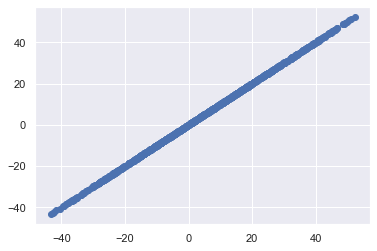

In [79]:
fig = plt.scatter(t, p)